In [1]:
# add folders to Python's search space
import os, sys
from pathlib import Path
script_dir = Path(os.path.dirname(os.path.abspath('')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)

# import the rest of the modules
%matplotlib nbagg
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import arch
import pandas as pd
DTYPE = 'float32'

C:\Users\pinak\Documents\GitHub\var-al


In [3]:
# load learned solutions
net_p = arch.VanillaNet(64, 3, DTYPE, name="helicoid")
net_p.load_weights('../data/helicoid/{}'.format(net_p.name)).expect_partial()

net_al = arch.VanillaNet(64, 3, DTYPE, name='helicoid-al')
net_al.load_weights('../data/helicoid-al/{}'.format(net_al.name)).expect_partial()

# define the true solution
def true(r, t):
    return t

<IPython.core.display.Javascript object>


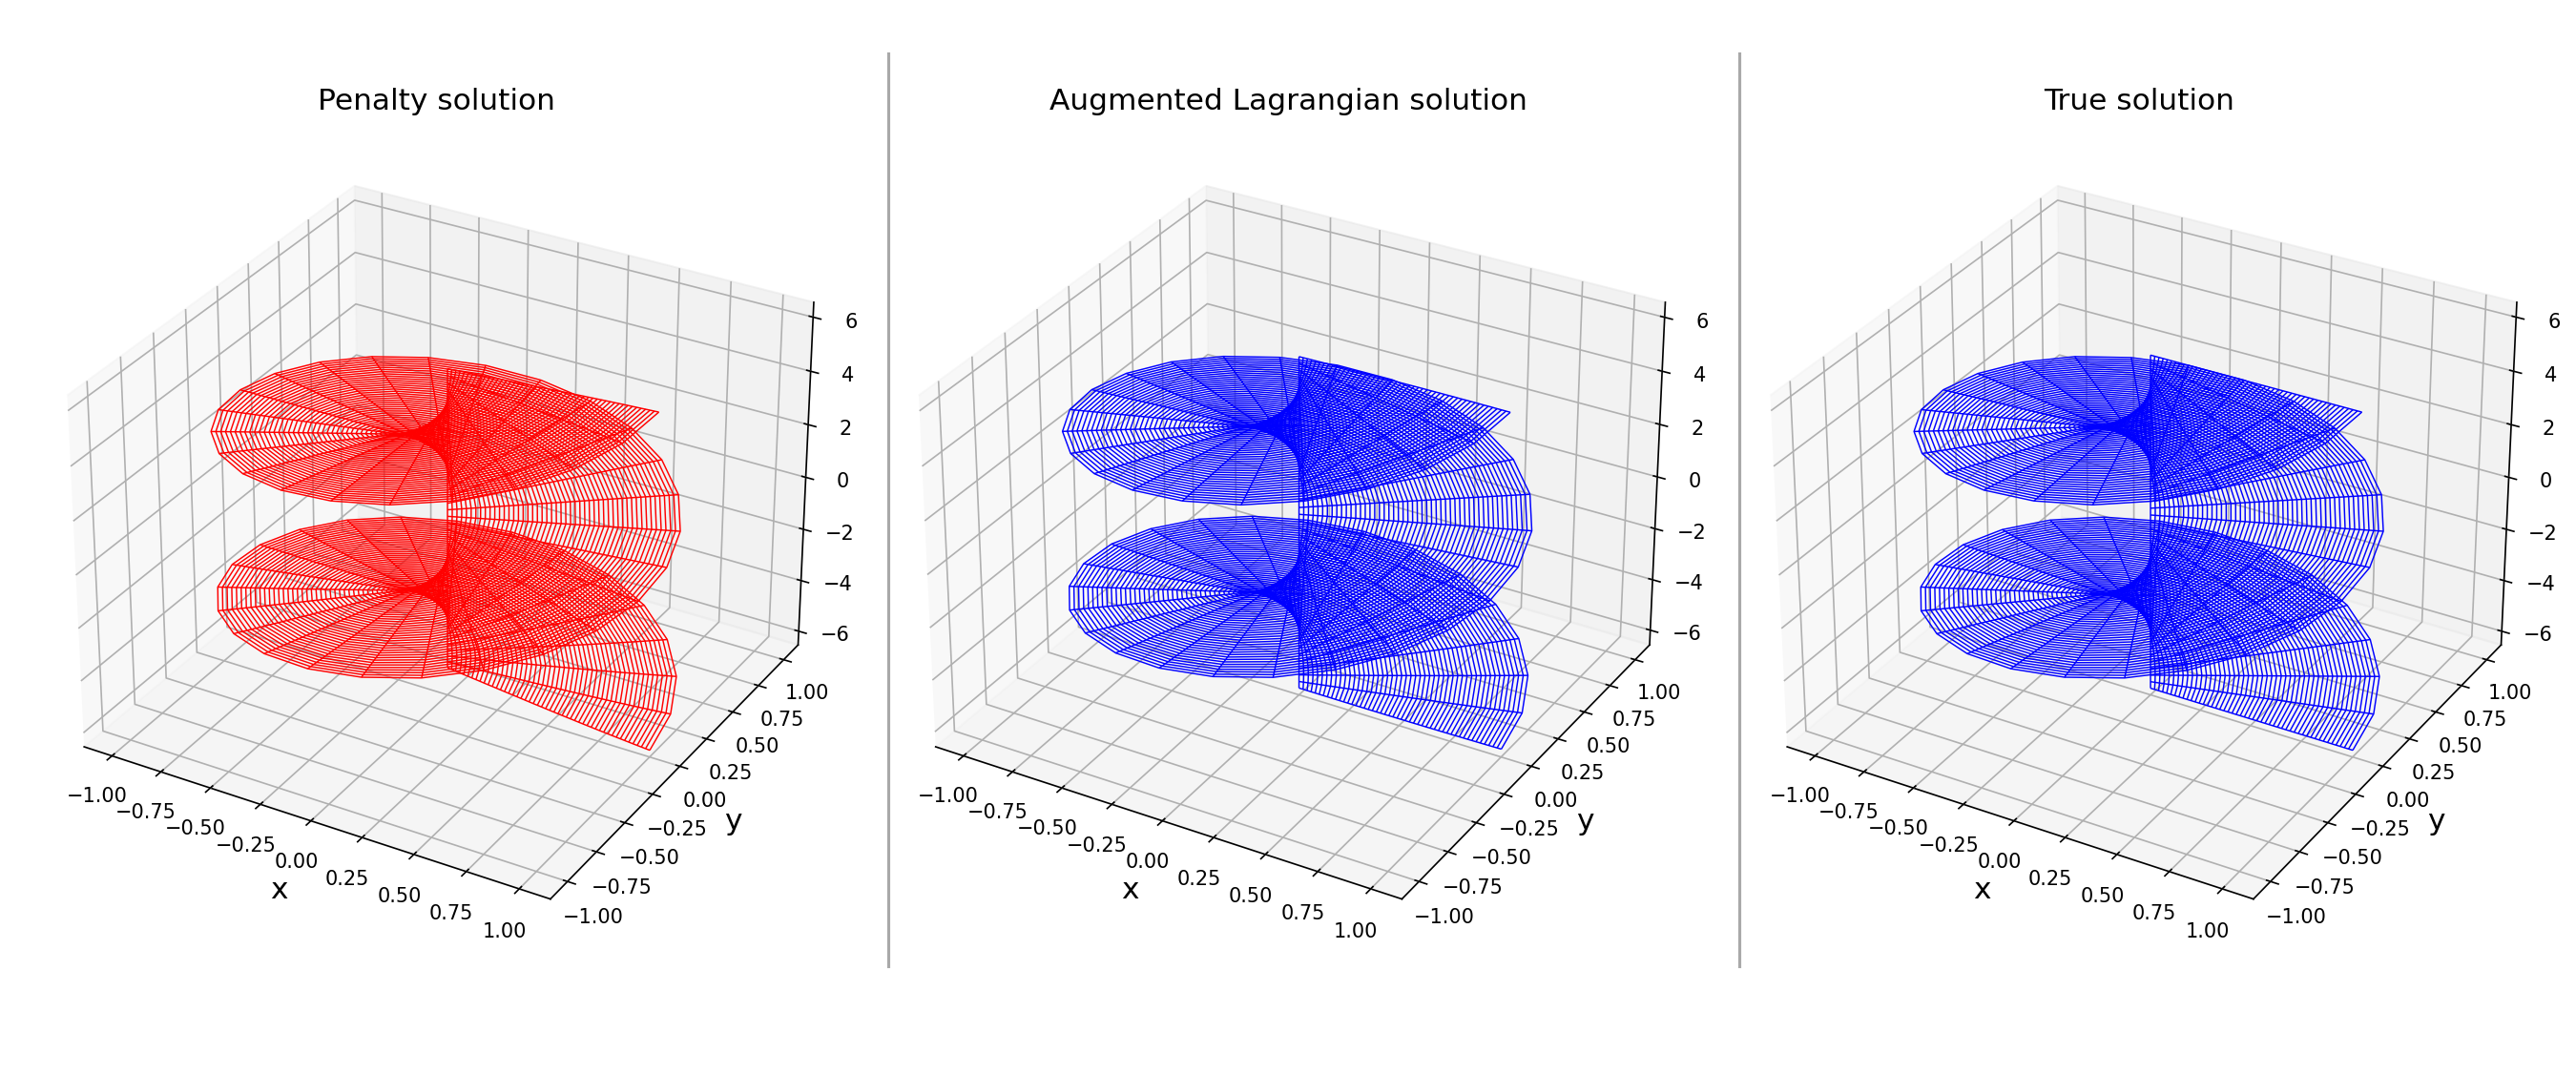

In [4]:
# set up plotting parameters
scale = 0
xlabel_size = ylabel_size = 15 + scale
tick_size = 10 + scale
legend_size = 15 + scale
title_size = 15 + scale
cbar_tick_size = 10 + scale
line_color = "darkgrey"

# plot solutions
def plot_solutions(filename, resolution=50):
    fig = plt.figure(figsize=(18, 7.5))
    ax_p = fig.add_subplot(131, projection='3d')
    ax_al = fig.add_subplot(132, projection='3d')
    ax_t = fig.add_subplot(133, projection='3d')
    # plotting params  
    ax_p.tick_params(axis='both', which='major', labelsize=tick_size)
    ax_p.tick_params(axis='both', which='minor', labelsize=tick_size)
    ax_p.set_title('Penalty solution', fontsize=title_size)
    ax_p.set_xlabel('x', fontsize=xlabel_size)
    ax_p.set_ylabel('y', fontsize=ylabel_size)
    
    ax_al.tick_params(axis='both', which='major', labelsize=tick_size)
    ax_al.tick_params(axis='both', which='minor', labelsize=tick_size)
    ax_al.set_title('Augmented Lagrangian solution', fontsize=title_size)
    ax_al.set_xlabel('x', fontsize=xlabel_size)
    ax_al.set_ylabel('y', fontsize=ylabel_size)

    ax_t.tick_params(axis='both', which='major', labelsize=tick_size)
    ax_t.tick_params(axis='both', which='minor', labelsize=tick_size)
    ax_t.set_title('True solution', fontsize=title_size)
    ax_t.set_xlabel('x', fontsize=xlabel_size)
    ax_t.set_ylabel('y', fontsize=ylabel_size)


    r = np.linspace(0., 1., num=resolution, endpoint=True).astype(DTYPE)
    t = np.linspace(-2.*np.pi, 2.*np.pi, num=resolution, endpoint=True).astype(DTYPE)
    r, t = np.meshgrid(r, t)
    x, y = r*np.cos(t), r*np.sin(t)
    z_p = net_p(r.reshape(-1, 1), t.reshape(-1, 1)).numpy()
    z_al = net_al(r.reshape(-1, 1), t.reshape(-1, 1)).numpy()
    z_t = true(r, t)
    grid = (resolution, resolution)
    z_p = z_p.reshape(grid)
    z_al = z_al.reshape(grid)
    z_t = z_t.reshape(grid)
    ax_p.plot_wireframe(x, y, z_p, color='red', linewidth=0.7)
    ax_al.plot_wireframe(x, y, z_al, color='blue', linewidth=0.7)
    ax_t.plot_wireframe(x, y, z_t, color='blue', linewidth=0.7)
    # plot and save
    # fig.subplots_adjust(wspace=0.4, hspace=0.2)
    # Get the bounding boxes of the axes including text decorations
    l = 0.3
    line = plt.Line2D([l+.045,l+.045],[0.1,0.95], transform=fig.transFigure, color=line_color)
    fig.add_artist(line)
    l = 0.63
    line = plt.Line2D([l+.045,l+.045],[0.1,0.95], transform=fig.transFigure, color=line_color)
    fig.add_artist(line)
    fig.tight_layout()
    plt.savefig('{}.png'.format(filename), dpi=300)
    plt.show()

plot_solutions(filename='../plots/helicoid-surface')

In [5]:
t = np.linspace(0., np.pi, 10).reshape(-1, 1).astype(DTYPE)
net_al(tf.ones_like(t), t)-t

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 4.9986294e-04],
       [-2.0095706e-04],
       [-3.3783913e-04],
       [-2.2292137e-04],
       [ 5.4049492e-04],
       [ 4.6193600e-04],
       [-1.8119812e-05],
       [-1.7547607e-04],
       [ 6.5827370e-04],
       [-9.9134445e-04]], dtype=float32)>

In [6]:
net_p(tf.ones_like(t), t)-t

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[-6.8383478e-04],
       [ 3.8325787e-05],
       [-1.6331673e-04],
       [-4.7016144e-04],
       [ 3.8588047e-04],
       [ 4.8196316e-04],
       [ 1.9407272e-04],
       [ 1.3685226e-04],
       [ 7.4744225e-04],
       [-7.8868866e-04]], dtype=float32)>